# Testing of Hypothesis

### Normality Test

 Shapiro-Wilk test

 To test Ho: sample data follows Normal distribution  ag   Ha: sample data do not follow Normal distribution


In [1]:
import numpy as np

numbers = np.random.normal(loc=0, scale=1, size=10)

numbers


array([ 1.29242739, -1.06286446,  0.52180966,  0.48800588,  0.1292857 ,
       -0.08118754,  0.90247169,  0.39697578,  0.95952723, -0.4764048 ])

In [2]:
from scipy.stats import shapiro

data = [-0.38643607,  1.73557419, -0.0911418 , -1.08161919, -0.36203798,
        0.72519735,  0.10326694, -0.00982909, -0.1441663 , -0.23285427]

test_stat, p_value = shapiro(data)

print('test statistic=%.2f, p value=%.2f' %(test_stat, p_value))

test statistic=0.88, p value=0.12


#### Since p= 0.12 and alpha=0.05 (i.e. taken as 5% level of significance),
we can say that as p is not < alpha, we fail to reject Ho and suggest that the data follows a Normal distribution
at 5% level of significance

### Equality of variance test

Levene test

To test Ho: k samples have equal variance  against   Ha: k samples do not have equal variance


In [3]:

from scipy.stats import levene

data_1 = [26, 28, 30, 32, 34]

data_2 = [10,  20,  30,  40,  50]


In [4]:
np.var(data_1)

8.0

In [5]:
np.var(data_2)

200.0

In [6]:
test_stat, p_value = levene(data_1, data_2)

print('test statistic=%.2f, p value=%.2f' %(test_stat, p_value))

test statistic=6.33, p value=0.04


#### Since p= 0.04 and alpha=0.05 (i.e. taken as 5% level of significance),
we can say that as p is < alpha, we reject Ho and suggest that the samples do not have equal variance

### Equality of variance test

#### Bartlett test

In [7]:

from scipy.stats import bartlett

data_1 = np.arange(10, 101, 2)

data_2 = np.arange(10, 101, 2)


In [8]:
data_1

array([ 10,  12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,
        36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,
        62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,
        88,  90,  92,  94,  96,  98, 100])

In [9]:
data_2

array([ 10,  12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,
        36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,
        62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,
        88,  90,  92,  94,  96,  98, 100])

In [10]:
np.var(data_1)

705.0

In [11]:
np.var(data_2)

705.0

In [12]:
test_stat, p_value = bartlett(data_1, data_2)

print('test statistic=%.2f, p value=%.2f' %(test_stat, p_value))

test statistic=0.00, p value=1.00


#### Since p= 1.00 and alpha=0.05 (i.e. taken as 5% level of significance),
we can say that as p is not < alpha, we fail to reject Ho and suggest that the samples have equal variance

### One sample t test

  To test Ho: the population mean = specific value against Ha: the population mean is not equal to the specific value

  To test Ho: population mean = 471 against Ha: population mean > 471   (ONE TAILED TEST)

In [13]:
data = [445, 489, 474, 505, 553, 477, 454, 463, 466, 557, 502, 449, 438, 500, 466, 477, 557, 433, 545, 511, 590,
       561, 560]

In [14]:
from scipy.stats import ttest_1samp

test_stat, p_value = ttest_1samp(data, popmean=471, alternative='two-sided') # By default two tailed test

print('test statistic=%.2f, p value=%.2f' %(test_stat, p_value))

test statistic=2.84, p value=0.01


#### Since this is a one-tailed test and ttest_1samp() is a two tailed test by default,
so, we divide the p value by 2 i.e 0.01/2 and check with alpha

In [15]:
correct_p_value = 0.01/2
correct_p_value

0.005

#### Since correct_p_value= 0.005 and alpha=0.05 (i.e. taken as 5% level of significance),
we can say that as p is < alpha, we reject Ho and suggest that the population mean > 471

In [16]:
from scipy.stats import ttest_1samp

test_stat, p_value = ttest_1samp(data, popmean=471, alternative='greater') # alternative: right tailed

print('test statistic=%.3f, p value=%.3f' %(test_stat, p_value))

test statistic=2.838, p value=0.005


#### Since p value is < alpha, we reject Ho and suggest that the population mean > 471

### Two sample t test (Independent sample)

To test Ho: means of the two groups are equal against   Ha: the means of the two groups are unequal

New employees are expected to attend a 1 month training program to know Analytics. At the end of the seminar, they are tested
to measure their knowledge about Analytics. The usual training method comprises of lectures and QnA session. Management
decides to experiment with different training procedure where the new employees are given recorded sessions.
If the procedure works, it could save the Company huge amount of money. However, there will also be a concern about the 
effectiveness of this new method and the company would like to know whether there is any difference in the effectiveness
of the two methods

In [17]:
data1 = [56,50, 52,44,52,47,47,53,45,48,42,51,42,43,44]

data2 = [59,54,55,65,52,57,64,53,53,56,53,57]

In [18]:
# t-Test: Two sample assuming Equal Variance

# Variance is unknown but assumed to be approximately equal (equal_var = True)

# To test Ho: means of group 1 and group 2 are equal against Ha: the means of the two groups are unequal

In [19]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(data1,data2, equal_var=True,alternative='two-sided') 
# By default two tailed test and equal var=True

print('test statistic=%.2f, p value=%.4f' %(test_stat, p_value))


test statistic=-5.20, p value=0.0000


In [20]:
# Since this is a two tailed test, we div the p value by two
# So correct p value = p value/2 = 0.0000
# Since correct p value is less than alpha=0.025 (two tailed test, so alpha/2), we reject Ho and suggest that the
# population means of the two group are unequal at 5% level of significance assuming unknown variances are approximately equal

In [21]:
# t-Test: Two sample assuming Unequal Variances

# Variance is unknown but assumed to be  unequal (equal_var = False)

# To test Ho: means of group 1 and group 2 are equal against Ha: the means of the two groups are unequal

In [22]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(data1,data2, equal_var=False,alternative='two-sided') 
# By default two tailed test and equal var=True

print('test statistic=%.4f, p value=%.4f' %(test_stat, p_value))


test statistic=-5.2182, p value=0.0000


In [23]:
# Since p value/2 = 0.0000 is less than alpha=0.025, we reject Ho and suggest that the population means of the two group
# are unequal at 5% level of significance assuming unknown variances are unequal

In [24]:
# Paired t Test or Related t Test (Dependent sample)

# To test Ho: there is no difference between the two means of the same group  against   
# Ha: there is difference between the two means of the same group

# e.g Before and after study  -----> Study of 15 people before and after attending the 1 month weight loss training program

# Given below is the dataset of weight of 8 patients before and after taking a particular drug that claims to lose
# weight in patients

# This will help us to judge the efficacy of the particular drug

# So, this is a case of Related t test 

wt_before = [162,170,184,164,172,176,159,170]

wt_after = [168,158,186,155,143,161,160,135]


In [25]:
# To test Ho: there is no difference between the mean weight of the patients before and after taking the drug  against   
# Ha: mean weight of the patients before taking the drug > mean weight of the patients after taking the drug

# If Ho is rejected, we can claim that the particular drug is efficient in reducing the weight of the patients


In [26]:
from scipy.stats import ttest_rel

test_stat, p_value = ttest_rel(wt_before,wt_after, alternative='greater') # By default two tailed test
# By default two tailed test and equal var=True

print('test statistic=%.2f, p value=%.2f' %(test_stat, p_value))


test statistic=2.18, p value=0.03


In [27]:
# Since p value=0.03 is less than alpha=0.05, we reject Ho and suggest that the drug is efficient in reducing weight
# of the patients at 5% level of significance 

In [28]:
# ONE SAMPLE Z TEST 

# In Z test population variance is known

# To test Ho: the population mean = specific value against Ha: the population mean is not equal to the specific value

# According to HowtoAdvice.com, the average price charged to a customer to have a
# 12 by 18 wall-to-wall carpet shampoo cleaned is about $50. Suppose that a start-up
# carpet-cleaning company believes that in the region in which they operate, the
# average price for this service is higher. To test this hypothesis, the carpet-cleaning
# company randomly contacts 23 customers who have recently had a 12 by 18
# wall-to-wall carpet shampoo cleaned and asked the customers how much they
# were charged for the job. Suppose the resulting data are given below and that the
# population standard deviation price is $3.49. Use a 10% level of significance to test
# their hypothesis

data = [52, 52, 56, 50, 50, 51, 49, 49, 54, 51, 51, 48,
56, 52, 52, 53, 56, 52, 52, 56, 57, 48, 53]


# To test Ho : 𝜇 = 50 against Ha: 𝜇 > 50

# Population std dev, 𝜎 = 3.49 (given)

from scipy import stats
from statsmodels.stats import weightstats  

test_stat, p_value = weightstats.ztest(x1=data, x2=None, value=52.17, alternative='larger') # By default two tailed test
# For one tailed Z test, value is the mean of the sample

print('test statistic=%.4f, p value=%.4f' %(test_stat, p_value))

ModuleNotFoundError: No module named 'statsmodels'

In [29]:
import numpy as np

np.mean(data)

52.17391304347826

In [30]:
# Since p value is less than alpha=0.1 (10% given), we reject Ho and suggest that the claim made by the start up that
# in the region they operate, the average price for this service is higher is true at 10% level of significance 

In [31]:
# 2 sample Z test

# To test Ho: means of the two groups are equal against   Ha: the means of the two groups are unequal

# A random sample of 32 advertising managers from across the United States is taken.
# The advertising managers are contacted and asked what their annual salary is.
# A similar random sample is taken of 34 auditing managers. The resulting salary data are
# listed below, along with the population variances.

# Test whether there is a difference in the average wage of an advertising manager and an auditing manager

adv_mngr = [74.256, 64.276,96.234, 74.194, 89.807, 65.360, 93.261, 73.904, 103.030, 54.270, 74.195, 59.045,75.932, 68.508, 
                80.742, 71.115, 39.672, 67.574, 45.652, 59.621, 93.083, 62.483, 63.384, 69.319, 57.791, 35.394, 65.145, 86.741, 
                96.767, 57.351, 77.242, 67.056]

aud_mngr = [69.962, 67.160,55.052, 37.386,57.828, 59.505,63.362, 72.790,37.194, 71.351,99.198, 58.653,61.254, 63.508,73.065, 
            43.649,48.036, 63.369,60.053, 59.676,66.359, 54.449,61.261, 46.394,77.136, 71.804,66.035, 72.401,54.335, 56.470,
             42.494, 67.814,83.849, 71.492]

# Population std for advertising manager = 16.253
# Population std for auditing manager = 12.900


# To test Ho: there is no difference in the average wage of an advertising manager and an auditing manager
#  against Ha: there is a difference in the average wage of an advertising manager and an auditing manager


In [32]:
from scipy import stats
from statsmodels.stats import weightstats  

test_stat, p_value = weightstats.ztest(adv_mngr, x2=aud_mngr, value=0) # By default two tailed test
# In two sample case, value is the difference between the means under Ho
# Here Ho: mean difference = 0,  so value=0

print('test statistic=%.4f, p value=%.5f' %(test_stat, p_value))

ModuleNotFoundError: No module named 'statsmodels'

In [33]:
# Since it is a two tailed test by default, the reported p value will always be computed fot two tailed test
# So correct p value will be obtained by dividing the p value output by 2

In [34]:
correct_p_value = 0.01807/2
correct_p_value

0.009035

In [35]:
# Since correct p value=0.009035 is less than alpha/2=0.025 (alpha = 5% assumed), we reject Ho and suggest that
# there is a difference in the average wage of an advertising manager and an auditing manager
# at 5% level of significance 

In [36]:
# ANOVA

# Analysis of Variance (ANOVA) is a statistical technique that is used to check if the means of two or more groups are
# significantly different from each other. 

# Assumptions

# 1. The samples are independent.
# 2. Each sample is from a normally distributed population.
# 3. The population standard deviations of the groups are all equal.  
#    This property is known as homoscedasticity.


# To test Ho: mean of Group 1 = mean of Group 2 = mean of Group 3
# against Ha: Atleast one of the Group means is different from the other

# e.g. Studying the effect of smoking on different age groups

# Suppose a claim has been made that age has a significant impact on smoking habits
# i.e the factor “age” influences smoking habits.

# Here Smoking is a continuous variable (no. of hrs of Cigarette smoking per month)
# Age ----> converted into a Categorical variable with 3 Age groups
# Age Group 1 -----> Upto 25 yrs
# Age Group 2 -----> 25 to 40 yrs
# Age Group 3 -----> Greater than 40 yrs


# Another eg.

# There are three Customer Relationship officers who sit at the branch and help customers get their requirements fulfilled.
# These officers offer many services that can be offered using the customer data base available to each officer and without
# any discretionary powers i.e. all officers have same operating environment.

# The bank manager want to know if there is any difference in the efficiency of the 3 officers

# To test Ho: Mean Performance of Officer 1 = Mean Performance of Officer 2 = Mean Performance of Officer 3
# against Ha: Atleast one of the mean performance of Officer is different from the other

import pandas as pd

data = pd.DataFrame({'Officer': ['Officer_1','Officer_2','Officer_3']*6,
                      'Performance': [15,22,18,18,27,24,19,18,19,22,21,16,11,17,22,0,0,15]})

In [37]:
data

,Officer,Performance
0,Officer_1,15
1,Officer_2,22
2,Officer_3,18
3,Officer_1,18
4,Officer_2,27
5,Officer_3,24
6,Officer_1,19
7,Officer_2,18
8,Officer_3,19
9,Officer_1,22


In [38]:
Off_1 = data[data.Officer=='Officer_1']['Performance']
Off_2 = data[data.Officer=='Officer_2']['Performance']
Off_3 = data[data.Officer=='Officer_3']['Performance']

In [39]:
Off_1

0     15
3     18
6     19
9     22
12    11
15     0
Name: Performance, dtype: int64

In [40]:
Off_2

1     22
4     27
7     18
10    21
13    17
16     0
Name: Performance, dtype: int64

In [41]:
Off_3

2     18
5     24
8     19
11    16
14    22
17    15
Name: Performance, dtype: int64

In [42]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(Off_1, Off_2, Off_3)
print('test statistic=%.4f, p value=%.5f' %(test_stat, p_value))

test statistic=0.6883, p value=0.51764


In [43]:
# A company has three manufacturing plants, and company officials want to determine whether there is a difference 
# in the average age of workers at the three locations. The following data are the ages of five randomly selected workers 
# at each plant. 

# Perform a one-way ANOVA to determine whether there is a significant difference in the mean ages of the workers at the 
# three plants. 
# Use alpha = .01 and note that the sample sizes are equal.

plant_1 = [29,27,30,27,28]
plant_2 = [32,33,31,34,30]
plant_3 = [25,24,24,25,26]

# To test Ho: The average age of the workers at the three plants are equal
# against Ha: Atleast one of the means is different from the others

In [44]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(plant_1, plant_2, plant_3)
print('test statistic=%.4f, p value=%.5f' %(test_stat, p_value))

test statistic=39.7143, p value=0.00001


In [45]:
# Since the p value is < alpha(0.05), we reject Ho and conclude that the average age of the workers at one of the plant is 
# different from the others

<AxesSubplot:title={'center':'age'}, xlabel='plant'>

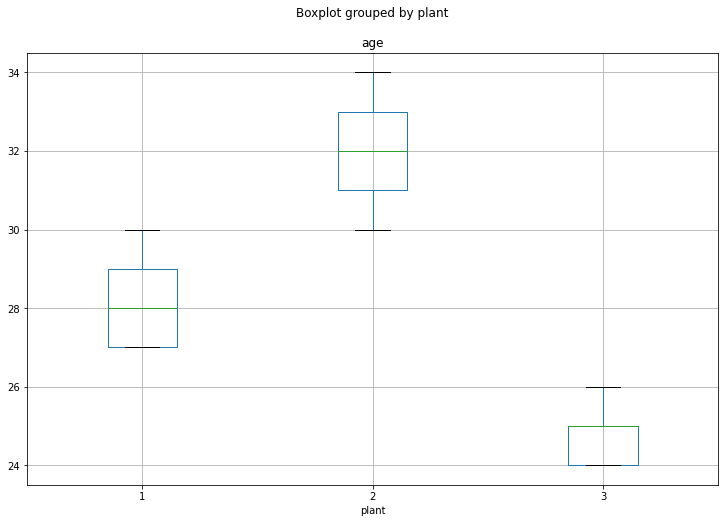

In [46]:
# But how do we know that?

# Creating Boxplot

data = pd.DataFrame({'plant':[1,1,1,1,1,   2,2,2,2,2,   3,3,3,3,3],
                    'age':[29,27,30,27,28,   32,33,31,34,30,   25,24,24,25,26]})

data.boxplot('age',by='plant', figsize=(12,8))

In [47]:
# ANOVA Tukey's HSD Test for pairwise multiple comparisons.

# endog ----> dependent variable (continuous in nature)
# groups ----> categorical variable

# For three age groups

# Ho: mean_1 = mean_2      against  Ha:  mean_1 not equal to mean_2
# Ho: mean_1 = mean_2      against  Ha:  mean_1 not equal to mean_2
# Ho: mean_1 = mean_2      against  Ha:  mean_1 not equal to mean_2


from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog = data['age'], groups=data['plant'], alpha=0.05)

print(m_comp)

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
# Since p value is < alpha for all the three possible pairwise comparisons
# We can conclude that the mean ages between any and all pairs of plants are significantly different

In [50]:
# Since the p value(0.00005) is < alpha(0.05), we reject Ho and conclude that the average age of the workers at one of the 
# plant is different from the others

In [51]:
# Non parametric tests

# Non-parametric tests are distribution-free statistics because they can be used without considering the shape of 
# the population distribution.

# They are used for nominal or ordinal scale data


# Chi Square Goodness of Fit test

# Extension of binomial distribution where more than two possible outcomes can occur in a single trial.

# Data is nominal or ordinal in nature.

# Here we compare the expected frequencies of categories from a population distribution to the observed frequencies 
# from a distribution

#i.e. here we check whether there is a difference between what was expected and what was observed.


# To test Ho:  observed distribution = expected distribution   
# against  Ha:  observed distribution is not equal to the expected distribution

# Problem

# A computer programmer has developed an algorithm for generating five first 5 alphabets at random and the code has given the
# following result when ran 500 times

# Alphabets     A            B            C          D           E
# Frequency     104          112          102        94          88

# Is there evidence that there is good fit to show that random alphabet generator is working correctly?
# Use alpha = 0.05

In [52]:
obs_freq = np.array([104,112,102,94,88])

exp_freq = np.array([100,100,100,100,100])

chi_square_stat = ((obs_freq - exp_freq)**2/exp_freq).sum()
chi_square_stat

3.44

In [53]:
import scipy.stats as st

st.chisquare(obs_freq,exp_freq)

Power_divergenceResult(statistic=3.44, pvalue=0.4870599223192619)

In [54]:
# Since p value is not < alpha, we fail to reject Ho and conclude that there is no evidence to suggest that the
# random alphabet generator is working correctly at 5% level of significance

In [55]:
# Chi square test of Independence

# Here we test whether the two variables (with multiple categories) are independent or not

# To test    Ho: Variable 1 is independent of Variable 2     
# against    Ha:  Variable 1 is not independent of Variable 2

# A Company has chosen three pension plans. Management wishes to know whether the preference for plans is independent of
# job classification and wants to use alpha = 0.05. The opinion of a random sample of 500 employees are shown below:

#                                        PENSION PLAN
#            JOB CLASSIFICATION     1         2        3        TOTAL

#            Salaried Workers       21        36       30        87
#            Hourly Workers         48        26       19        93

#             TOTAL                 69        62       49        180


from scipy.stats import chi2_contingency

table = [[21,36,30],[48,26,19]]

test_stat, p_value, dof, expected = chi2_contingency(table)

print('test stat=%.4f, p value=%.4f' %(test_stat, p_value))


test stat=14.4636, p value=0.0007
